In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("audiodata.csv")
df = df.dropna(axis = 0, how = 'any')
df

Unnamed: 0                           artist  \
0     spotify:track:1mmTLkwVGn2OoqMEWGoEsj                       'Vulfpeck'   
1     spotify:track:4Z9fL58gHxgBLPQRaevsdJ                    'Ginger Root'   
2     spotify:track:6zukGpcjPkCJDOYUhlGWiE         'Celestial Aeon Project'   
3     spotify:track:3fSenClo4FAV1Gkmc4wVyz                    'Taeko Onuki'   
4     spotify:track:49DMmKK4yBRmXyCDpJI2fr                  'Gordon Crosse'   
...                                    ...                              ...   
2490  spotify:track:5Wn2bANwvucH2VdStpCOcj  'Juan Erlando & His Latin Band'   
2491  spotify:track:1VKGY2SYspp4DzhvjTQjeA              'Mikis Theodorakis'   
2492  spotify:track:3Njg0fvZyGeYbjLDgLrSiZ                      'Cory Wong'   
2493  spotify:track:5qZpJLJisa4TmQhSLgSpOd           'Ludwig van Beethoven'   
2494  spotify:track:1kBhyFCGXoy6Ldoxl4zMJl                 'Hector Berlioz'   

                                                   name  acousticness  \
0     'The Sweet Science (Live at Madison Square Gar...        0.8680   
1                                 'For Once in My Life'        0.2190   
2     'Epilogue (From "The Legend of Zelda Breath of...        0.9870   
3                                  'Tsuki no Kizahashi'        0.9910   
4     'Concerto for Chamber Orchestra, Op. 8: II. Le...        0.9480   
...                                                 ...           ...   
2490                        'Samba Tucada - Remastered'        0.4460   
2491                                     "Girl's Dance"        0.9590   
2492                                       'Click Bait'        0.0614   
2493   'Symphony No. 7 in a Major, Op. 92: III. Presto'        0.9430   
2494                                 'Harold en Italie'        0.7830   

      danceability  energy  instrumentalness  liveness  loudness  speechiness  \
0            0.302  0.4990             0.857    0.4690   -11.764       0.0494   
1            0.434  0.8170             0.306    0.2870    -5.589       0.0695   
2            0.692  0.0881             0.948    0.0930   -19.591       0.1130   
3            0.445  0.0570             0.120    0.0817   -19.163       0.0400   
4            0.125  0.1540             0.893    0.1010   -19.090       0.0444   
...            ...     ...               ...       ...       ...          ...   
2490         0.528  0.6250             0.927    0.0847    -7.396       0.0302   
2491         0.228  0.0767             0.948    0.1030   -18.456       0.0402   
2492         0.739  0.9630             0.922    0.1390    -6.167       0.0746   
2493         0.295  0.1180             0.790    0.0815   -20.559       0.0476   
2494         0.182  0.0326             0.569    0.0979   -30.221       0.0430   

        tempo  valence  time_signature   key  
0     122.508   0.1920             3.0   2.0  
1     105.877   0.6180             4.0   4.0  
2     136.071   0.2480             4.0   7.0  
3      84.516   0.1640             4.0   0.0  
4      84.289   0.0350             3.0   8.0  
...       ...      ...             ...   ...  
2490  126.923   0.8720             4.0   9.0  
2491   70.060   0.0523             3.0  11.0  
2492  106.975   0.6860             4.0   9.0  
2493  128.547   0.1690             4.0   2.0  
2494   87.877   0.0866             4.0   4.0  

[2492 rows x 14 columns]

In [3]:
# Convert data rows into floats
datacols = ['acousticness', 'danceability', 'energy', 'instrumentalness',
            'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'time_signature', 'key']
for i in range(len(datacols)) :
    df[datacols[i]].astype(float)

In [4]:
df #.sort_values(['instrumentalness'], ascending=True)

Unnamed: 0                           artist  \
0     spotify:track:1mmTLkwVGn2OoqMEWGoEsj                       'Vulfpeck'   
1     spotify:track:4Z9fL58gHxgBLPQRaevsdJ                    'Ginger Root'   
2     spotify:track:6zukGpcjPkCJDOYUhlGWiE         'Celestial Aeon Project'   
3     spotify:track:3fSenClo4FAV1Gkmc4wVyz                    'Taeko Onuki'   
4     spotify:track:49DMmKK4yBRmXyCDpJI2fr                  'Gordon Crosse'   
...                                    ...                              ...   
2490  spotify:track:5Wn2bANwvucH2VdStpCOcj  'Juan Erlando & His Latin Band'   
2491  spotify:track:1VKGY2SYspp4DzhvjTQjeA              'Mikis Theodorakis'   
2492  spotify:track:3Njg0fvZyGeYbjLDgLrSiZ                      'Cory Wong'   
2493  spotify:track:5qZpJLJisa4TmQhSLgSpOd           'Ludwig van Beethoven'   
2494  spotify:track:1kBhyFCGXoy6Ldoxl4zMJl                 'Hector Berlioz'   

                                                   name  acousticness  \
0     'The Sweet Science (Live at Madison Square Gar...        0.8680   
1                                 'For Once in My Life'        0.2190   
2     'Epilogue (From "The Legend of Zelda Breath of...        0.9870   
3                                  'Tsuki no Kizahashi'        0.9910   
4     'Concerto for Chamber Orchestra, Op. 8: II. Le...        0.9480   
...                                                 ...           ...   
2490                        'Samba Tucada - Remastered'        0.4460   
2491                                     "Girl's Dance"        0.9590   
2492                                       'Click Bait'        0.0614   
2493   'Symphony No. 7 in a Major, Op. 92: III. Presto'        0.9430   
2494                                 'Harold en Italie'        0.7830   

      danceability  energy  instrumentalness  liveness  loudness  speechiness  \
0            0.302  0.4990             0.857    0.4690   -11.764       0.0494   
1            0.434  0.8170             0.306    0.2870    -5.589       0.0695   
2            0.692  0.0881             0.948    0.0930   -19.591       0.1130   
3            0.445  0.0570             0.120    0.0817   -19.163       0.0400   
4            0.125  0.1540             0.893    0.1010   -19.090       0.0444   
...            ...     ...               ...       ...       ...          ...   
2490         0.528  0.6250             0.927    0.0847    -7.396       0.0302   
2491         0.228  0.0767             0.948    0.1030   -18.456       0.0402   
2492         0.739  0.9630             0.922    0.1390    -6.167       0.0746   
2493         0.295  0.1180             0.790    0.0815   -20.559       0.0476   
2494         0.182  0.0326             0.569    0.0979   -30.221       0.0430   

        tempo  valence  time_signature   key  
0     122.508   0.1920             3.0   2.0  
1     105.877   0.6180             4.0   4.0  
2     136.071   0.2480             4.0   7.0  
3      84.516   0.1640             4.0   0.0  
4      84.289   0.0350             3.0   8.0  
...       ...      ...             ...   ...  
2490  126.923   0.8720             4.0   9.0  
2491   70.060   0.0523             3.0  11.0  
2492  106.975   0.6860             4.0   9.0  
2493  128.547   0.1690             4.0   2.0  
2494   87.877   0.0866             4.0   4.0  

[2492 rows x 14 columns]

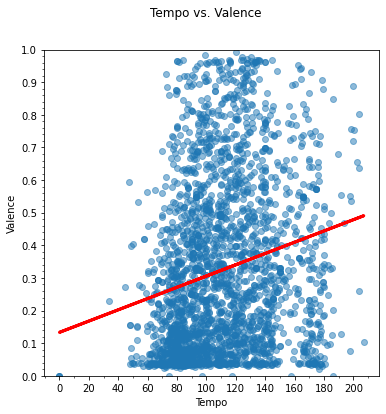

In [24]:
# Correlation between danceability and mood
x = df["tempo"].values
y = df["valence"].values

x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

regr = linear_model.LinearRegression()
regr.fit(x,y)

fig = plt.figure(figsize=(6, 6))
fig.suptitle("Tempo vs. Valence")

ax = plt.subplot(1, 1, 1)
ax.scatter(x, y, alpha=0.5)
ax.plot(x, regr.predict(x), color="red", linewidth=3)
plt.xticks(())
plt.yticks(())

ax.set_ylim(0,1)

ax.xaxis.set_major_locator(ticker.MultipleLocator(20.0))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(10.0))

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))

plt.xlabel("Tempo")
plt.ylabel("Valence")

plt.show()

In [21]:
# plt.ylim(0, 1)
# # sns.set(rc={'figure.figsize' : (15,15)})
# sns.regplot(x='loudness', y='energy', data = df, line_kws= {'color':'red'}).set(title="Loudness vs. Energy")

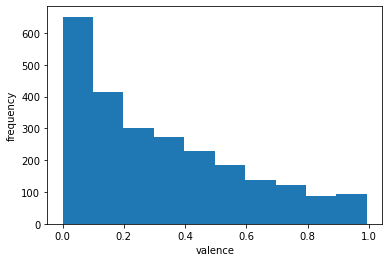

In [37]:
acousticness = 'acousticness'
danceability = 'danceability'
energy = 'energy'
instrumentalness = 'instrumentalness'
liveness = 'liveness'
loudness = 'loudness'
speechiness = 'speechiness'
tempo = 'tempo'
valence = 'valence'

fig = plt.hist(df[valence])

plt.xlabel(valence)
plt.ylabel('frequency')

plt.show()

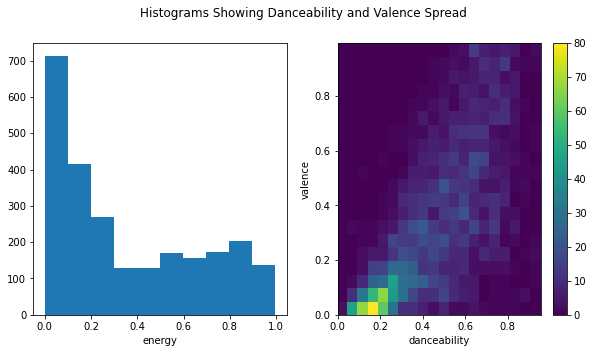

In [7]:
x = "danceability"
y = "valence"

fig, (ax1, ax2), (ax3, ax4) = plt.subplots(1, 2, sharey=False, sharex=False, figsize=(10, 5))
fig.suptitle("Histograms Showing Danceability and Valence Spread")
h = ax2.hist2d(df[x], df[y], bins=20)
ax1.hist(df["energy"])

ax2.set_xlabel(x)
ax2.set_ylabel(y)

ax1.set_xlabel("energy")

plt.colorbar(h[3], ax=ax2)

plt.show()


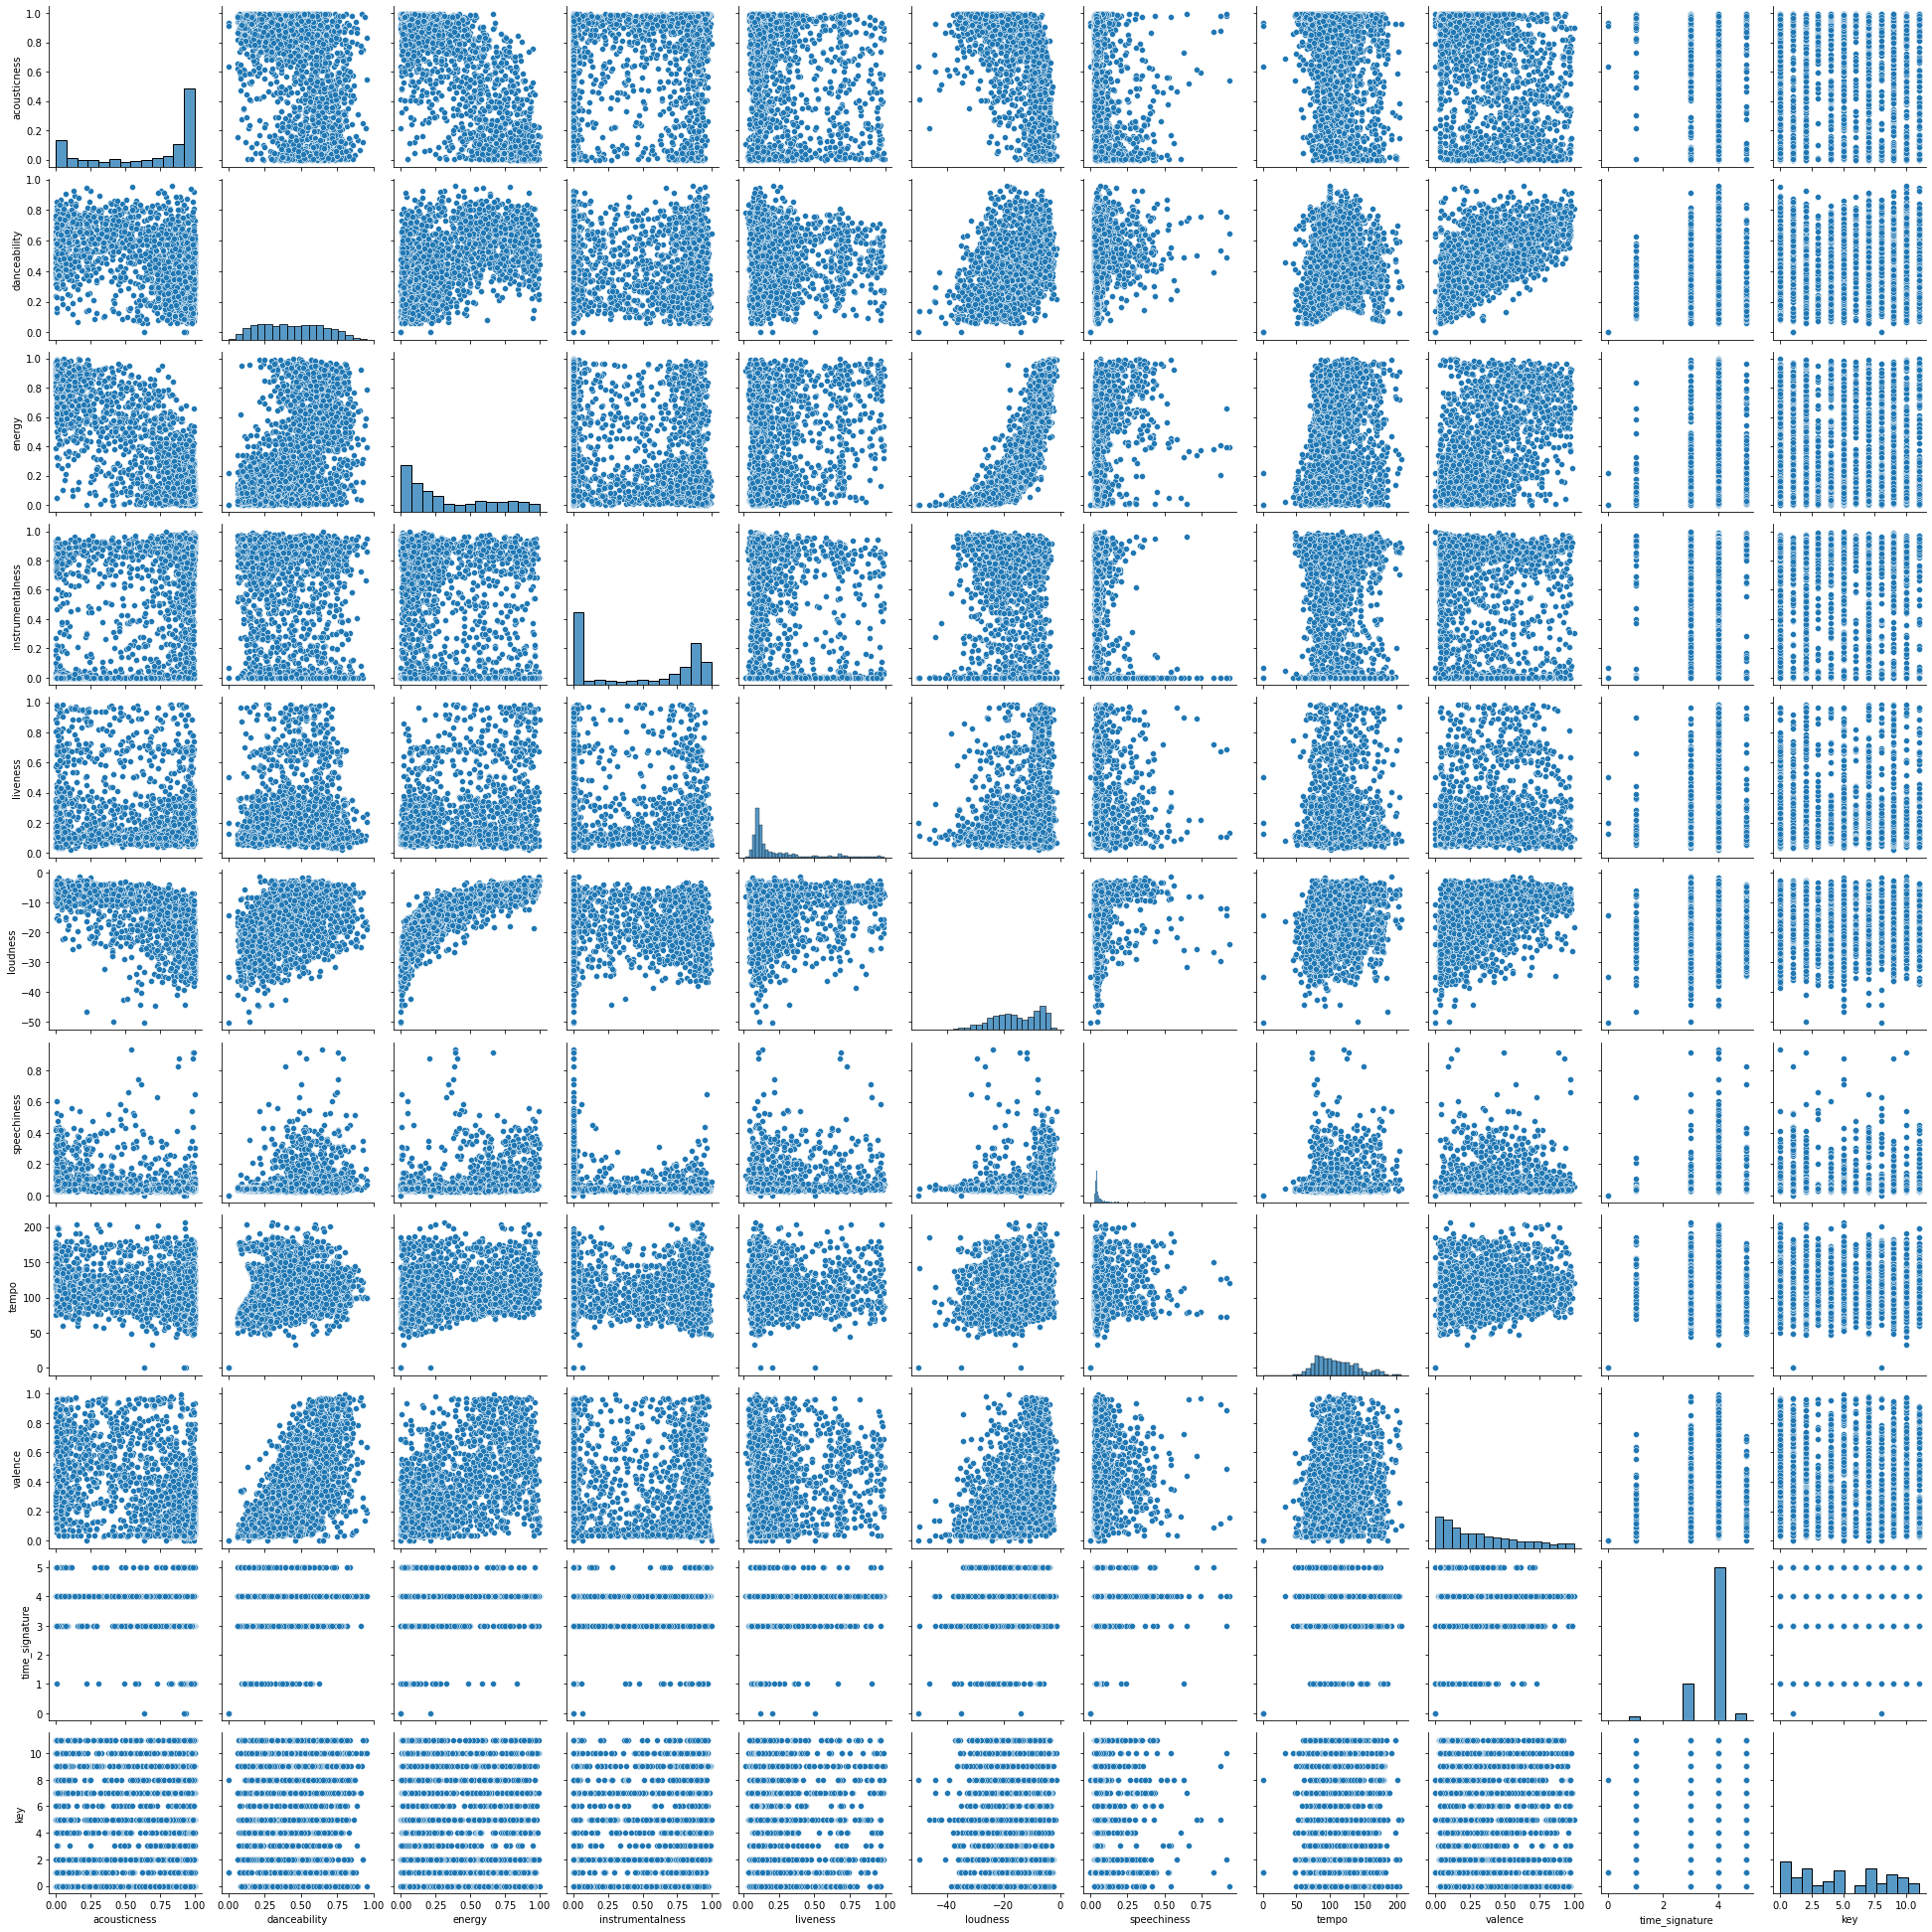

In [7]:
sns.pairplot(df)

In [38]:
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.offline as py
chosen = ["energy", "liveness", "tempo", "valence", "loudness", "speechiness", "acousticness", "danceability", "instrumentalness"]
text1 = df["artist"] + " - " + df["name"]
text2 = text1.values

# X = data_frame.drop(droppable, axis=1).values
X = df[chosen].values
y = df["danceability"].values

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

pca = PCA(n_components=3)
pca.fit(X)

X = pca.transform(X)

py.init_notebook_mode(connected=True)

trace = go.Scatter3d(x=X[:, 0],
                    y=X[:, 1],
                    z=X[:, 2],
                    text=text2,
                    mode="markers",
                    marker=dict(size=8,color=y)
                    )

fig = go.Figure(data=[trace])
py.iplot(fig, filename="test-graph")

In [48]:
chosen = ["energy", "liveness", "tempo", "valence"]
text1 = df["artist"] + " - " + df["name"]
text2 = text1.values

# X = data_frame.drop(droppable, axis=1).values
X = df[chosen].values
y = df["loudness"].values

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

pca = PCA(n_components=2)
pca.fit(X)

X = pca.transform(X)

fig = {
    "data": [
        {
            "x": X[:, 0],
            "y": X[:, 1],
            "text": text2,
            "mode": "markers",
            "marker": {"size": 8, "color": y}
        }
    ],
    "layout": {
        "xaxis": {"title": "How danceable is this?"},
        "yaxis": {"title": "How classical is this?"}
    }
}

py.iplot(fig, filename="test-graph2")


In [50]:
import time

chosen = ["energy", "liveness", "tempo", "valence", "loudness",
          "speechiness", "acousticness", "danceability", "instrumentalness"]

X = df[chosen].values
y = df["loudness"].values

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)


fig = {
    "data": [
        {
            "x": tsne_results[:, 0],
            "y": tsne_results[:, 1],
            "text": text2,
            "mode": "markers",
            "marker": {"size": 8, "color": y}
        }
    ],
    "layout": {
        "xaxis": {"title": "x-tsne"},
        "yaxis": {"title": "y-tsne"}
    }
}

py.iplot(fig, filename="test-graph2")

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2492 samples in 0.003s...
[t-SNE] Computed neighbors for 2492 samples in 0.088s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2492
[t-SNE] Computed conditional probabilities for sample 2000 / 2492
[t-SNE] Computed conditional probabilities for sample 2492 / 2492
[t-SNE] Mean sigma: 0.138953
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.674263
[t-SNE] KL divergence after 300 iterations: 1.320240
